# Sea Level Predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level. -->

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

### Read the data

In [4]:
df=pd.read_csv("epa-sea-level.csv")

#### Create scatter plot

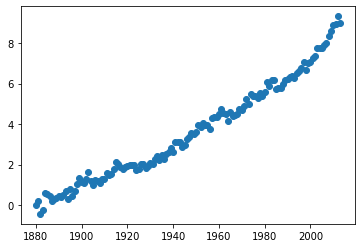

In [5]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])

#### Create first line of best fit

C:\Users\chris\AppData\Local\Temp\ipykernel_1696\1288045970.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"Year": y} for y in range(add_year + 1, 2050)])


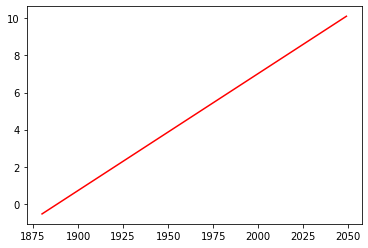

In [6]:
res=linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
add_year = df["Year"].max()
df = df.append([{"Year": y} for y in range(add_year + 1, 2050)])
plt.plot(df['Year'],res.intercept + res.slope*df['Year'], 'r')

#### Create second line of best fit

C:\Users\chris\AppData\Local\Temp\ipykernel_1696\3335200224.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post2000 = df_post2000.append( [{"year": y} for y in range(add_year + 1, 2050)] )


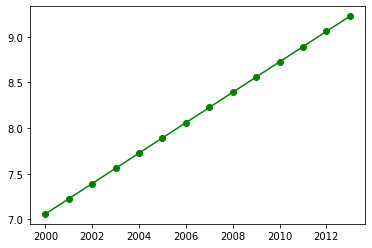

In [13]:
df_post2000=df.loc[(df["Year"] >= 2000) & (df["Year"] <= add_year)]
res2=linregress(df_post2000['Year'],df_post2000['CSIRO Adjusted Sea Level'])
df_post2000 = df_post2000.append( [{"year": y} for y in range(add_year + 1, 2050)] )
plt.plot(df_post2000['Year'],res2.intercept + res2.slope*df_post2000['Year'], 'o-g')

#### Add labels and title and plot together

Text(0, 0.5, 'Sea Level (inches)')

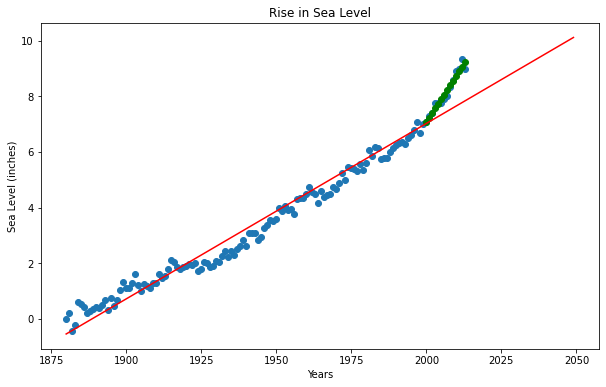

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(df_post2000['Year'],res2.intercept + res2.slope*df_post2000['Year'], 'o-g')
plt.plot(df['Year'],res.intercept + res.slope*df['Year'], 'r')
plt.title("Rise in Sea Level")
plt.xlabel("Years")
plt.ylabel("Sea Level (inches)")